In [1]:
#Importamos las librerías necesarias para llevar a cabo el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from datetime import date, time, datetime
import ast

# FUNCIÓN PARA VALIDAR FECHAS:

In [2]:
def fecha_año_mes_día(fechas):
    '''
    Input:
    - fechas: Serie de fechas informadas en tipo string, las cuales se van a comprobar si recogen
        fechas correctas y en el formato "YYYY-MM-DD"
    Ouput:
    - ind_fechas_ko: Lista que contiene los índices de aquellos elementos de la serie 
        introducida como input que no cumplen lo esperado
    '''
    ind_fechas_ko = []
    for i, fecha in enumerate(fechas):
        try: 
            datetime.strptime(fecha, '%Y-%m-%d').date()
        except:
            ind_fechas_ko.append(i)
            continue
    return ind_fechas_ko

# ANÁLISIS DE FECHAS DE ESTRENO DE NETFLIX:

## Películas:

In [26]:
netflix_movies_spain = pd.read_csv(r".\data\netflix_movies.csv")
netflix_movies_spain

,Unnamed: 0,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
0,0,El hoyo 2,The Platform 2,1125510,"[878, 53, 18, 27]",2024-09-27,2554.356,5.700,536,es,False
1,1,The Bad Guys: Haunted Heist,The Bad Guys: Haunted Heist,1329336,"[16, 35]",2024-10-02,944.292,7.400,47,en,False
2,2,Strul,Trouble,1210794,"[28, 35, 80]",2024-10-02,917.854,7.100,77,sv,False
3,3,Bangkok Breaking: ฝ่านรกเมืองเทวดา,Bangkok Breaking: Heaven and Hell,1337309,"[28, 80, 18, 53]",2024-09-26,664.257,6.500,29,th,False
4,4,Joker,Joker,475557,"[80, 53, 18]",2019-10-01,478.179,8.151,25441,en,False
...,...,...,...,...,...,...,...,...,...,...,...
5614,5614,Congreso Anyway,Congreso Anyway,999044,[99],1993-04-01,0.001,0.000,0,nl,False
5615,5615,Homo sapiens. Une nouvelle histoire de l'homme.,Homo Futurus: The Inside Story,920782,"[99, 36]",2005-10-29,0.001,0.000,0,fr,False
5616,5616,Wild Records!,Wild Records!,655704,[],2001-02-03,0.001,0.000,0,pl,False
5617,5617,Не все кошки серы,Not all the Cats are Gray,460784,[],2004-01-01,0.001,0.000,0,ru,False


In [27]:
#Eliminamos la primera columna puesto que no contiene informacción relevante (es el índice duplicado)
netflix_movies_spain.drop("Unnamed: 0", axis=1, inplace=True)

Vamos a verificar que la API no nos haya proporcionado películas duplicadas:

In [28]:
netflix_movies_spain["id"].value_counts().sort_values(ascending=False)

id
2907       2
335983     1
475557     1
4011       1
831815     1
          ..
920782     1
655704     1
460784     1
339510     1
1289045    1
Name: count, Length: 5618, dtype: int64

La película con ID 2907 está repetida, vamos a ver cómo es para determinar qué hacemos con la película que identifica:

In [29]:
netflix_movies_spain[netflix_movies_spain["id"] == 2907]

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
39,The Addams Family,The Addams Family,2907,"[35, 14]",1991-11-22,133.875,7.1,4493,en,False
40,The Addams Family,The Addams Family,2907,"[35, 14]",1991-11-22,149.164,7.1,4493,en,False


Si nos fijamos, vemos que es el campo de ```popularity``` el único que diferencia ambos registros. Puesto que no sabemos cuál es el correcto y ambos valores son muy próximos entre sí, vamos a calcular la media de ambos y se la asignamos a la película (dejando un único registro para ella):

In [30]:
aux_media = (netflix_movies_spain.iloc[39, 5] + netflix_movies_spain.iloc[40, 5])/2
aux_media

141.5195

In [32]:
netflix_movies_spain.iloc[35:41,:]

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
35,君たちはどう生きるか,The Boy and the Heron,508883,"[16, 12, 14, 10751, 18]",2023-07-14,161.125,7.500,1702,ja,False
36,Beverly Hills Cop: Axel F,Beverly Hills Cop: Axel F,280180,"[28, 35, 80]",2024-06-20,128.064,6.777,1024,en,False
37,The Dark Knight Rises,The Dark Knight Rises,49026,"[28, 80, 18, 53]",2012-07-17,108.016,7.781,22549,en,False
38,It Chapter Two,It Chapter Two,474350,"[27, 18, 14]",2019-09-04,166.664,6.845,8643,en,False
39,The Addams Family,The Addams Family,2907,"[35, 14]",1991-11-22,133.875,7.100,4493,en,False
40,The Addams Family,The Addams Family,2907,"[35, 14]",1991-11-22,149.164,7.100,4493,en,False


In [33]:
#Borramos una de las filas
netflix_movies_spain.drop(index=39, axis = 0, inplace=True)
netflix_movies_spain.reset_index(drop=True)

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
0,El hoyo 2,The Platform 2,1125510,"[878, 53, 18, 27]",2024-09-27,2554.356,5.700,536,es,False
1,The Bad Guys: Haunted Heist,The Bad Guys: Haunted Heist,1329336,"[16, 35]",2024-10-02,944.292,7.400,47,en,False
2,Strul,Trouble,1210794,"[28, 35, 80]",2024-10-02,917.854,7.100,77,sv,False
3,Bangkok Breaking: ฝ่านรกเมืองเทวดา,Bangkok Breaking: Heaven and Hell,1337309,"[28, 80, 18, 53]",2024-09-26,664.257,6.500,29,th,False
4,Joker,Joker,475557,"[80, 53, 18]",2019-10-01,478.179,8.151,25441,en,False
...,...,...,...,...,...,...,...,...,...,...
5613,Congreso Anyway,Congreso Anyway,999044,[99],1993-04-01,0.001,0.000,0,nl,False
5614,Homo sapiens. Une nouvelle histoire de l'homme.,Homo Futurus: The Inside Story,920782,"[99, 36]",2005-10-29,0.001,0.000,0,fr,False
5615,Wild Records!,Wild Records!,655704,[],2001-02-03,0.001,0.000,0,pl,False
5616,Не все кошки серы,Not all the Cats are Gray,460784,[],2004-01-01,0.001,0.000,0,ru,False


In [34]:
netflix_movies_spain.iloc[35:41,:]

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
35,君たちはどう生きるか,The Boy and the Heron,508883,"[16, 12, 14, 10751, 18]",2023-07-14,161.125,7.500,1702,ja,False
36,Beverly Hills Cop: Axel F,Beverly Hills Cop: Axel F,280180,"[28, 35, 80]",2024-06-20,128.064,6.777,1024,en,False
37,The Dark Knight Rises,The Dark Knight Rises,49026,"[28, 80, 18, 53]",2012-07-17,108.016,7.781,22549,en,False
38,It Chapter Two,It Chapter Two,474350,"[27, 18, 14]",2019-09-04,166.664,6.845,8643,en,False
40,The Addams Family,The Addams Family,2907,"[35, 14]",1991-11-22,149.164,7.100,4493,en,False
41,The Deliverance,The Deliverance,930600,"[27, 53]",2024-08-16,148.897,6.300,357,en,False


In [9]:
#Asignamos la media calculada previamente al registro de la película para el que hemos borrado su duplicado (nos hemos quedado con el registro de índice 40)
netflix_movies_spain.iloc[40, 5] = aux_media

In [11]:
netflix_movies_spain[netflix_movies_spain["id"] == 2907]

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
40,The Addams Family,The Addams Family,2907,"[35, 14]",1991-11-22,149.164,7.1,4493,en,False


In [12]:
netflix_movies_spain.iloc[40, 5]

141.5195

In [14]:
netflix_movies_spain.iloc[40,:]

original_title       The Deliverance
title                The Deliverance
id                            930600
genre_ids                   [27, 53]
release_date              2024-08-16
popularity                  141.5195
vote_average                     6.3
vote_count                       357
original_language                 en
adult                          False
Name: 41, dtype: object

In [5]:
netflix_movies_spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_title     5619 non-null   object 
 1   title              5619 non-null   object 
 2   id                 5619 non-null   int64  
 3   genre_ids          5619 non-null   object 
 4   release_date       5617 non-null   object 
 5   popularity         5619 non-null   float64
 6   vote_average       5619 non-null   float64
 7   vote_count         5619 non-null   int64  
 8   original_language  5619 non-null   object 
 9   adult              5619 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 400.7+ KB


Tal y como podemos ver en la celda anterior: 

- Todas las columnas vienen informadas
- Los campos numéricos son:
    1. ```id``` --> A pesar de estar almacenado como *int64*, es realmente una variable categórica, por lo que no nos interesa calcular ningún estadístico sobre ella. Adicionalmente, al obtener la extracción de la información de la API, demostramos que dicho campo no tenía duplicados (además, se trata de la clave por la que se cruza con la información de otros endpoints).
    2. ```popularity``` --> Refleja la popularidad de la película
    3. ```vote_average``` --> Es la media de las votaciones que hay en TMDB
    4. ```vote_count```--> Es el número de votaciones que hay en TMDB

In [6]:
netflix_movies_spain[["popularity", "vote_average", "vote_count"]].describe()

,popularity,vote_average,vote_count
count,5619.000000,5619.000000,5619.000000
mean,17.301586,5.862802,721.964406
std,47.807364,1.840649,2368.441024
min,0.000000,0.000000,0.000000
25%,2.737000,5.500000,7.000000
50%,7.561000,6.246000,31.000000
75%,18.435500,6.900000,220.000000
max,2554.356000,10.000000,36382.000000


Para analizar el consumo de películas a lo largo del tiempo, vamos a hacerlo a nivel anual. Para ello, tenemos que fijarnos en el campo ```release_date```: Gracias al método **info** aplicado al principio, sabemos que se trata de un campo que es de tipo *str*. Además, si nos fijamos en el formato en el que viene informada la fecha, podemos ver que es *YYYY-MM-DD*. A continuación, vamos a verificar que todas las fechas:

1. Vienen informadas
2. En el formato *YYYY-MM-DD*
3. No son incoherentes (por ejemplo, no tenemos un 45 de enero, un 30 de febrero...)

Para estos dos últimos pasos, lo hacemos mediante la función ***fecha_año_mes_día***  definida [al principio del notebook](#función-para-validar-fechas).

In [7]:
#Vemos que todas las películas tienen una release date asociada
netflix_movies_spain["release_date"].isna().unique()

array([False])

In [8]:
#Vemos que no hay fechas incorrectas para las películas de Netflix
netflix_movies_ko_dates = fecha_año_mes_día(netflix_movies_spain["release_date"])
netflix_movies_ko_dates

[]

In [9]:
#Mediante la función pd.to_datetime convertimos el campo "release" de tipo string a uno de tipo fecha
#Gracias a dt.year, nos quedamos únicamente con el año correspondiente a esa fecha
netflix_movies_spain_year = netflix_movies_spain.groupby(pd.to_datetime(netflix_movies_spain["release_date"]).dt.year)["original_title"].count().sort_index()
netflix_movies_spain_year

release_date
1917      2
1918      1
1919      3
1920      1
1923      3
       ... 
2020    476
2021    532
2022    553
2023    494
2024    242
Name: original_title, Length: 102, dtype: int64

## Series:

Repetimos los pasos análogos a las películas

In [10]:
netflix_series_spain = pd.read_csv(r".\data\netflix_series.csv")
netflix_series_spain.drop("Unnamed: 0", axis=1, inplace=True)
netflix_series_spain.head()

,original_name,name,id,genre_ids,first_air_date,popularity,vote_average,vote_count,original_language,adult
0,Prison Break,Prison Break,2288,"[10759, 80, 18]",2005-08-29,985.135,8.079,5044,en,False
1,Outer Banks,Outer Banks,100757,"[10759, 18, 9648]",2020-04-15,1165.631,8.400,887,en,False
2,七つの大罪 黙示録の四騎士,The Seven Deadly Sins: Four Knights of the Apo...,218843,"[16, 10759, 10765]",2023-10-08,534.912,8.700,113,ja,False
3,Monsters,Monsters,225634,"[18, 80]",2024-09-19,721.391,7.586,187,en,False
4,Klass 95: El poder de la belleza,KLASS 95: The Power of Beauty,262252,"[18, 35, 10751]",2024-08-20,388.277,6.800,6,es,False


In [11]:
netflix_series_spain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_name      2486 non-null   object 
 1   name               2486 non-null   object 
 2   id                 2486 non-null   int64  
 3   genre_ids          2486 non-null   object 
 4   first_air_date     2482 non-null   object 
 5   popularity         2486 non-null   float64
 6   vote_average       2486 non-null   float64
 7   vote_count         2486 non-null   int64  
 8   original_language  2486 non-null   object 
 9   adult              2486 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 177.4+ KB


Tal y como podemos ver en la celda anterior: 

- Todas las columnas vienen informadas, excepto ```first_air_date```
- Los campos numéricos son:
    1. ```id``` --> Misma conclusión que para los identificadores de las películas
    2. ```popularity``` --> Refleja la popularidad de la película
    3. ```vote_average``` --> Es la media de las votaciones que hay en TMDB
    4. ```vote_count```--> Es el número de votaciones que hay en TMDB

In [12]:
netflix_series_spain[["popularity", "vote_average", "vote_count"]].describe()

,popularity,vote_average,vote_count
count,2486.000000,2486.000000,2486.000000
mean,36.284239,6.895527,296.670957
std,70.581639,1.415147,1087.417183
min,0.002000,0.000000,0.000000
25%,7.280000,6.500000,12.000000
50%,15.091500,7.100000,39.000000
75%,34.736500,7.700000,146.000000
max,1165.631000,10.000000,17559.000000


Para analizar el consumo de series a lo largo del tiempo, vamos a hacerlo a nivel anual. Para ello, tenemos que fijarnos en el campo ```first_air_date```: Igual que para las películas, sabemos que se trata de un campo que es de tipo *str* que recoge fechas con formato *YYYY-MM-DD*. Realizamos los mismos análisis que antes:

1. Ya detectamos que había algunas series que no tenían informada la fecha de primera emisión, veamos cuáles son:

In [13]:
netflix_series_spain[netflix_series_spain["first_air_date"].isna()]

,original_name,name,id,genre_ids,first_air_date,popularity,vote_average,vote_count,original_language,adult
2278,더 글로리,더 글로리,272659,"[18, 9648]",NaN,4.260,0.0,0,ko,False
2381,حب بين السطور,Love between the lines,232944,[],NaN,1.629,10.0,2,en,False
2394,Кордон,Cordon,253741,[18],NaN,1.505,0.0,0,ru,False
2434,Teen Titans Go! The Night Begins to Shine,Teen Titans Go! The Night Begins to Shine,231914,[16],NaN,1.403,0.0,0,en,False


Al tratarse de 4 series, no afectaría mucho a las estadísticas que generemos.

2. Verificación del formato (*YYYY-MM-DD*) y coherencia de las fechas: De nuevo, usamos la función ***fecha_año_mes_día***  definida [al principio del notebook](#función-para-validar-fechas).

In [14]:
netflix_series_ko_dates = fecha_año_mes_día(netflix_series_spain["first_air_date"])
netflix_series_ko_dates

[2278, 2381, 2394, 2434]

Tal y como podemos ver, las fechas incorrectas son las que vienen informadas en los registros de la tabla de índices [2278, 2381, 2394, 2434], los cuales se corresponden con los mismos que venían sin informar. Además, si nos fijamos, ninguna de ellas ha sido votada por los usuarios (```vote_count``` = 0) excepto una, la cual sólo ha tenido dos votos, si bien vemos que su popularidad en la plataforma tampoco es alta. Por ello, procedemos a borrar dichos registros de nuestro análisis, puesto que nos nos van a aportar información relevante.

In [15]:
netflix_series_spain.drop(netflix_series_ko_dates, axis=0, inplace=True)

In [16]:
netflix_series_spain_year = netflix_series_spain.groupby(pd.to_datetime(netflix_series_spain["first_air_date"]).dt.year)["original_name"].count().sort_index()
netflix_series_spain_year

first_air_date
1966      2
1969      1
1973      1
1987      2
1989      1
1991      3
1992      2
1993      1
1994      1
1995      3
1997      2
1998      3
1999      3
2000      4
2001      8
2002      3
2003      6
2004      7
2005      9
2006      4
2007     13
2008      7
2009     14
2010     16
2011     16
2012     21
2013     25
2014     24
2015     51
2016     96
2017    118
2018    232
2019    267
2020    302
2021    307
2022    381
2023    306
2024    220
Name: original_name, dtype: int64

A continuación, usamos un gráfico de líneas para representar la producción de películas y series de Netflix en España:

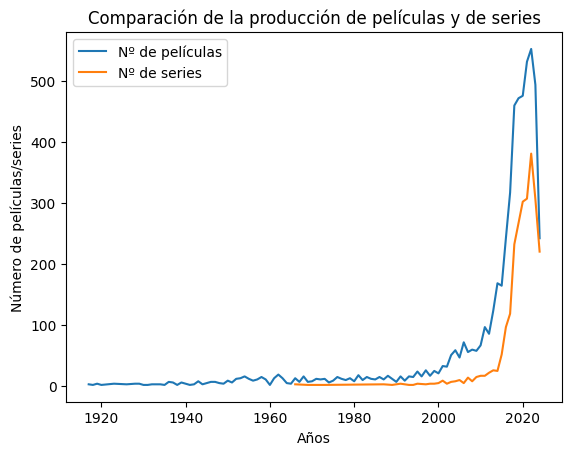

In [17]:
fig, ax = plt.subplots()
plt.title("Comparación de la producción de películas y de series")
plt.xlabel("Años")
plt.ylabel("Número de películas/series")
plt.plot(netflix_movies_spain_year, label = "Nº de películas")
plt.plot(netflix_series_spain_year, label = "Nº de series")
plt.legend();

No obstante, esta gráfica puede llevarnos a equívocos puesto que el número total de películas difiere del número total de series. Para poder hacer una **comparación más adecuada**, vamos a dibujar el **porcentaje de crecimiento de estrenos de las películas y de las series**: de este modo, en vez de reflejar información sobre números absolutos, mostraremos **el porcentaje de crecimiento/decrecimiento de estrenos de películas a lo largo del tiempo** (para más información sobre esto, mirar [este enlace](https://blog.datawrapper.de/dualaxis/)).

In [18]:
#Cogemos como punto inicial de referencia el primer valor para las series y las películas
movie_referencia = netflix_movies_spain_year.iloc[0]
serie_referencia = netflix_series_spain_year.iloc[0]
print("Número de películas de Netflix más antiguas (en cuanto a fecha de estreno, no a fecha de aparición en la plataforma):", movie_referencia, ", del año", netflix_movies_spain_year.index[0])
print("Número de series de Netflix más antiguas (en cuanto a fecha de estreno, no a fecha de aparición en la plataforma):", serie_referencia, ", del año", netflix_series_spain_year.index[0])

Número de películas de Netflix más antiguas (en cuanto a fecha de estreno, no a fecha de aparición en la plataforma): 2 , del año 1917
Número de series de Netflix más antiguas (en cuanto a fecha de estreno, no a fecha de aparición en la plataforma): 2 , del año 1966


In [19]:
#Calculamos los porcentajes de crecimiento de series y películas a lo largo de los años con respecto al año de referencia
porc_crec_movies = (netflix_movies_spain_year/movie_referencia)*100
porc_crec_series = (netflix_series_spain_year/serie_referencia)*100

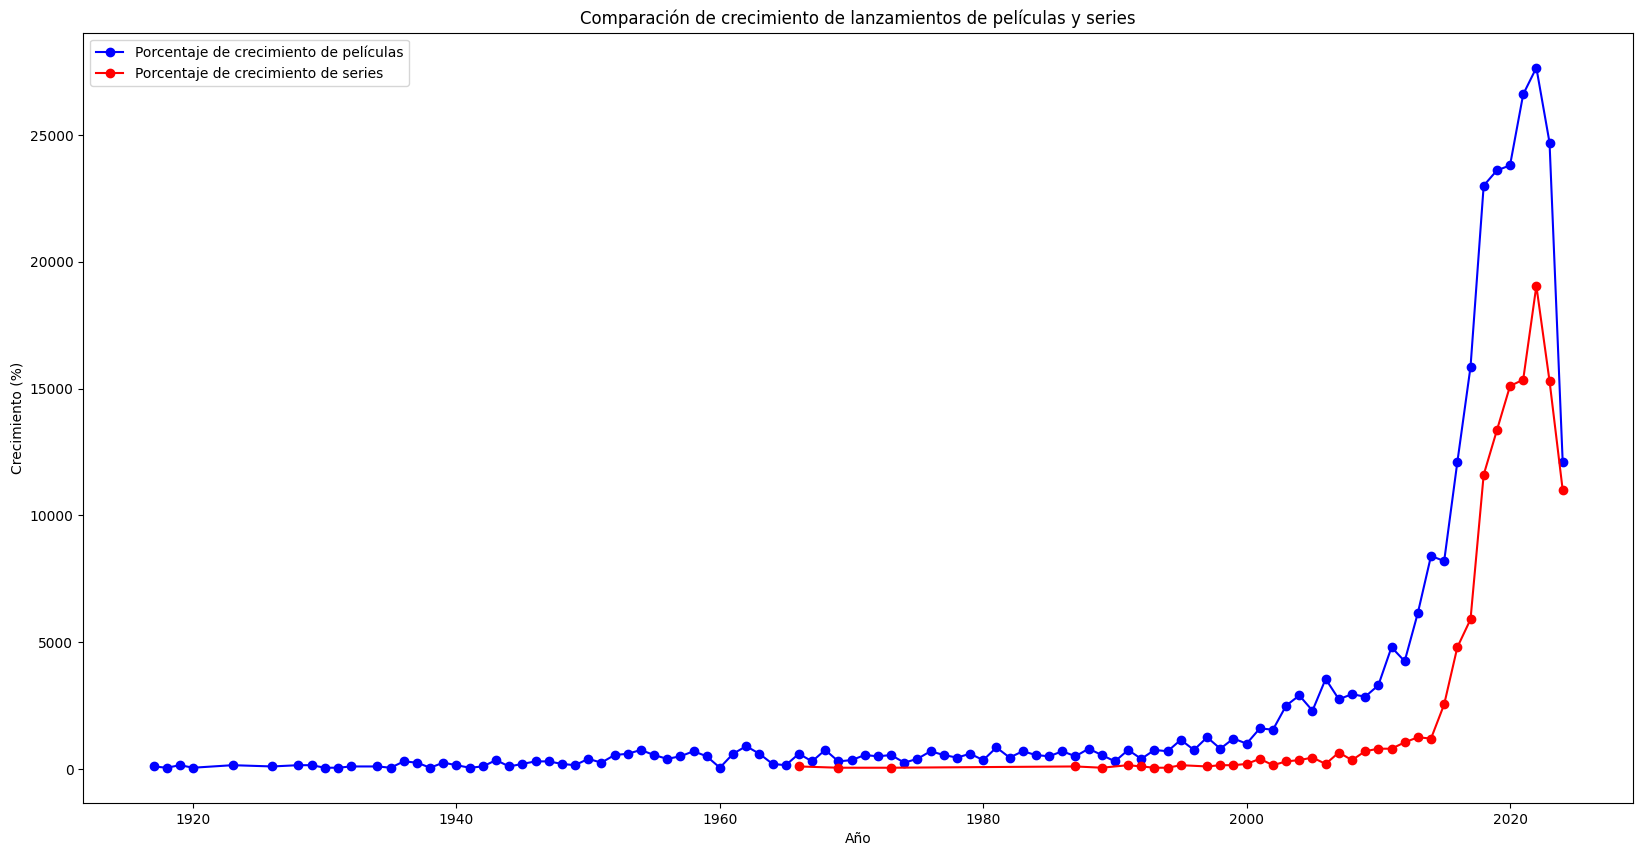

In [20]:
plt.figure(figsize=(20,10))

plt.plot(porc_crec_movies, color='b', marker='o', label='Porcentaje de crecimiento de películas')
plt.plot(porc_crec_series, color='r', marker='o', label='Porcentaje de crecimiento de series')
plt.title('Comparación de crecimiento de lanzamientos de películas y series')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.legend(loc = "upper left")
plt.show()

En ambos casos podemos ver que:

- Las series de Netflix más antiguas son más recientes que las películas más antiguas (hay películas de años previos a 1920, mientras que las primeras series datan de poco más de los años 60).
- Los estrenos se mantuvieron en línea hasta que...
    - El estreno de películas empezó a aumentar en torno al año 2000, habiendo un gran auge unos años más tarde, y el incremento máximo teniendo lugar en torno al 2020, para luego descender
    - El estreno de series empezó a aumentar un poco más tarde que el de las películas, siendo unos años antes del 2020 cuando tuvo un gran aumento, y siendo el incremento máximo más o menos a la par que el de las películas para, igual que estas, empezar a descender

# ANÁLISIS DE GÉNEROS DE NETFLIX:

Leemos las tablas que extraímos mediante la API de TMB que contienen el listado de géneros y sus correspondientes IDs para películas y series:

In [52]:
#Géneros de películas
movies_genres = pd.read_csv(r".\data\tmdb_movie_genres.csv")
movies_genres.drop("Unnamed: 0", axis=1, inplace=True)
movies_genres

,id,name
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [53]:
#Géneros de series
series_genres = pd.read_csv(r".\data\tmdb_series_genres.csv")
series_genres.drop("Unnamed: 0", axis=1, inplace=True)
series_genres

,id,name
0,10759,Action & Adventure
1,16,Animation
2,35,Comedy
3,80,Crime
4,99,Documentary
5,18,Drama
6,10751,Family
7,10762,Kids
8,9648,Mystery
9,10763,News


## Películas:

In [54]:
netflix_movies_spain.head(2)

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
0,El hoyo 2,The Platform 2,1125510,"[878, 53, 18, 27]",2024-09-27,3286.65,5.698,512,es,False
1,The Bad Guys: Haunted Heist,The Bad Guys: Haunted Heist,1329336,"[16, 35]",2024-10-02,1209.40,7.400,43,en,False


Como ya adelantamos en la extracción de los datos mediante la API de TMDB, los géneros de las series y películas vienen informados con unos identificadores, no con el nombre del género y, adicionalmente, una película puede tener asociados varios géneros (por ejemplo, véase en el output de la celda previa, el valor de ```genre_ids``` para la película de *El hoyo 2*).

Así pues, necesitamos "desglosar" la información de modo que podamos trabajar con ella, y lo haremos mediante ***pd.explode***:

In [55]:
#Primero generamos un dataset con dos columnas que recogen el nombre de cada película y su correspondiente
#valor "genre_ids" pasado de string a lista (así evitamos tener "[16, 35]", sino directamente [16,35])
netflix_movies_genre = pd.concat([netflix_movies_spain["title"], netflix_movies_spain["genre_ids"].apply(ast.literal_eval)],axis=1)
netflix_movies_genre

,title,genre_ids
0,The Platform 2,"[878, 53, 18, 27]"
1,The Bad Guys: Haunted Heist,"[16, 35]"
2,Trouble,"[28, 35, 80]"
3,Bangkok Breaking: Heaven and Hell,"[28, 80, 18, 53]"
4,Joker,"[80, 53, 18]"
...,...,...
5615,Het schildersleven van Rembrandt van Rijn,[99]
5616,The Lost Capital of Atlantis,[99]
5617,Congreso Anyway,[99]
5618,Homo Futurus: The Inside Story,"[99, 36]"


In [56]:
#Aplicamos el explode por la columna que queremos "desglosar"
netflix_movies_genre_expl= netflix_movies_genre.explode("genre_ids", ignore_index=True)
netflix_movies_genre_expl

,title,genre_ids
0,The Platform 2,878
1,The Platform 2,53
2,The Platform 2,18
3,The Platform 2,27
4,The Bad Guys: Haunted Heist,16
...,...,...
11046,The Lost Capital of Atlantis,99
11047,Congreso Anyway,99
11048,Homo Futurus: The Inside Story,99
11049,Homo Futurus: The Inside Story,36


Así pues, una vez tenemos definido un dataset en el que hay una fila por cada película-id género, procedemos a hacer un outer join del mismo con la tabla de id género-género definida [al principio del apartado](#análisis-de-géneros-de-netflix).

In [57]:
netflix_movies_genre_expl = pd.merge(netflix_movies_genre_expl, movies_genres, how= "outer", left_on="genre_ids", right_on="id")
netflix_movies_genre_expl.drop(["id"], axis=1, inplace=True)
netflix_movies_genre_expl.rename(columns={"name": "genre"}, inplace=True)
netflix_movies_genre_expl

,title,genre_ids,genre
0,The Platform 2,878,Science Fiction
1,The Platform,878,Science Fiction
2,It's What's Inside,878,Science Fiction
3,Venom,878,Science Fiction
4,Mantra Warrior: The Legend of The Eight Moons,878,Science Fiction
...,...,...,...
11046,The Jetfighters in Australia,NaN,NaN
11047,Sharks - The Big Five,NaN,NaN
11048,Diaries of the 1900's,NaN,NaN
11049,ALOHA,NaN,NaN


Si nos fijamos en la tabla previa, vemos que al final de la tabla, hay películas para las que no viene su/s género/s informados. Vamos a ver cuántos casos de géneros sin informar hay en dicha tabla:

In [61]:
netflix_movies_genre_expl["genre_ids"].isna().sum()

99

In [63]:
netflix_movies_genre_expl[netflix_movies_genre_expl["genre_ids"].isna()]

,title,genre_ids,genre
10952,The Flight of the Dove,NaN,NaN
10953,The Netflix Cup,NaN,NaN
10954,The Netflix Cup,NaN,NaN
10955,Married to Work,NaN,NaN
10956,Married to Work,NaN,NaN
...,...,...,...
11046,The Jetfighters in Australia,NaN,NaN
11047,Sharks - The Big Five,NaN,NaN
11048,Diaries of the 1900's,NaN,NaN
11049,ALOHA,NaN,NaN


In [64]:
netflix_movies_spain[netflix_movies_spain["title"] == "The Netflix Cup"]

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
2875,The Netflix Cup,The Netflix Cup,1204920,[],2023-11-14,7.883,1.0,1,en,False
2917,The Netflix Cup,The Netflix Cup,1204920,[],2023-11-14,7.883,1.0,1,en,False


In [67]:
netflix_movies_spain[netflix_movies_spain["title"] == "Married to Work"]

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
3173,Married to Work,Married to Work,1084758,[],2023-02-10,4.655,3.8,2,sw,False
3195,Married to Work,Married to Work,1084758,[],2023-02-10,4.655,3.8,2,sw,False
3550,Married to Work,Married to Work,1084758,[],2023-02-10,4.655,3.8,2,sw,False


In [66]:
len(netflix_movies_spain)

5620

# TENGO QUE QUITAR DUPLICADOS POR ID DE PELÍCULAS Y SERIES EN TODOS LOS DATASETS Y TRABAJAR CON ESO PORQUE HAY MUCHAS PELÍCULAS CON NOMBRES REPETIDOS!!!!!!!!!!!!!

In [71]:
netflix_movies_spain.groupby("id")["id"].count().sort_values(ascending=False)

id
1073659    4
87936      4
933547     4
1015999    4
671909     4
          ..
454854     1
454983     1
456193     1
456616     1
1367980    1
Name: id, Length: 4163, dtype: int64

In [72]:
netflix_movies_spain[netflix_movies_spain["id"] == 1073659]

,original_title,title,id,genre_ids,release_date,popularity,vote_average,vote_count,original_language,adult
3645,The Dads,The Dads,1073659,[99],2023-03-12,3.226,6.4,7,en,False
3667,The Dads,The Dads,1073659,[99],2023-03-12,3.226,6.4,7,en,False
3691,The Dads,The Dads,1073659,[99],2023-03-12,3.226,6.4,7,en,False
4042,The Dads,The Dads,1073659,[99],2023-03-12,3.226,6.4,7,en,False
